# Exercise 3

1. Accept user name, age and list of skills
2. Pass the state through 3 nodes that:
    - First node : Personalize name with greeting message
    - Second node : Describe user age
    - Third node : List the user skills
3. result field should have the final message

Output: "Praveen, welcome to the system! You are 25 years old and you have skills in [Python, Machine Learning, Deep Learning]"

hint: You have to use the add_edge method twice
    

In [1]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list[str]
    final: str

In [3]:
def greeting_node(state:AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state['name']}! welcome to the system!"
    return state

def age_node(state:AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f" You are {state['age']} years old!"

    return state

def skills_node(state:AgentState) -> AgentState:
    """This is the third node of our sequence"""

    state["final"] = state["final"] + f" You have skills in {state['skills']}"

    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("age_node", age_node)
graph.add_node("skills_node", skills_node)

graph.set_entry_point("greeting_node")
graph.add_edge("greeting_node", "age_node")
graph.add_edge("age_node", "skills_node")
graph.set_finish_point("skills_node")

app = graph.compile()

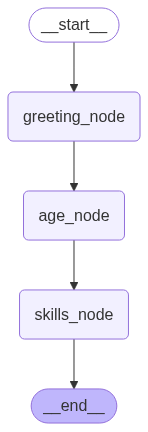

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name": "Praveen", "age": 25, "skills": ["Python", "Machine Learning", "Deep Learning"]})
print(result)

{'name': 'Praveen', 'age': 25, 'skills': ['Python', 'Machine Learning', 'Deep Learning'], 'final': "Hi Praveen! welcome to the system! You are 25 years old! You have skills in ['Python', 'Machine Learning', 'Deep Learning']"}


In [7]:
result["final"]

"Hi Praveen! welcome to the system! You are 25 years old! You have skills in ['Python', 'Machine Learning', 'Deep Learning']"